#### We will work on the columns *areaWithType*, *additionalRoom*, *agePossession*, *furnishDetails*, *features*

In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
base_url = "https://raw.githubusercontent.com/pranta-iitp/Real-Estate-Property-Price-Prediction-Project/main/gurgaon_properties_cleaned_v1.csv"
df = pd.read_csv(base_url)

### Column: areaWithType

1.   Carpet Area: The actual usable area within the walls of the flat where you can lay a carpet.Includes: All rooms, kitchen, bathrooms, and internal partition walls.Excludes: Thickness of outer walls, balconies, common areas, and any external space.
2.   Built-up Area: The carpet area plus the area covered by internal and external walls, and sometimes includes balconies or terraces (if exclusive to the unit).Includes: Carpet area, thickness of walls, and possibly balconies/terraces.Excludes: Common/shared areas like lobbies, lifts, and staircases.
3.   Super-Built-up Area: The built-up area plus a proportionate share of common areas such as lobbies, lifts, staircases, and amenities.Includes: Built-up area + share of common spaces.Excludes: Open spaces, parking areas (unless specified).

For flats, we will create above three columns from already existing columns areaWithType


In [4]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'pricePerSqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'additionalRoom',
       'floorNum', 'facing', 'agePossession', 'nearbyLocations',
       'furnishDetails', 'features'],
      dtype='object')

In [5]:
df.sample(5)[['property_type','area','areaWithType']]

,property_type,area,areaWithType
2786,flat,2781.0,Carpet area: 2785 (258.73 sq.m.)
3607,house,2700.0,Plot area 300(250.84 sq.m.)
2715,flat,2580.0,Built Up area: 2580 (239.69 sq.m.)
1599,flat,1923.0,Super Built up area 1920(178.37 sq.m.)
1976,flat,2943.0,Super Built up area 2943(273.41 sq.m.)


In [6]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [7]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [8]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [9]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
1249,0.35,flat,481.0,Super Built up area 583(54.16 sq.m.)Carpet area: 481 sq.ft. (44.69 sq.m.),583.0,NaN,481.0
3172,1.10,house,990.0,Built Up area: 990 (91.97 sq.m.),NaN,990.0,NaN
2562,2.65,flat,1582.0,Carpet area: 124,NaN,NaN,124.0
2968,2.10,house,900.0,Plot area 100(83.61 sq.m.),NaN,NaN,NaN
368,1.85,flat,2150.0,Super Built up area 2150(199.74 sq.m.)Built Up area: 1650 sq.ft. (153.29 sq.m.)Carpet area: 1350 sq.ft. (125.42 sq.m.),2150.0,1650.0,1350.0


In [10]:
# where all the three columns values are present
df[((df['super_built_up_area'].isnull() == False) & (df['built_up_area'].isnull()== False) & (df['carpet_area'].isnull()== False))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(535, 7)

In [11]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,18
pricePerSqft,18
area,18
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


In [12]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2999,5.60,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
3281,0.92,house,603.0,Plot area 67(56.02 sq.m.),NaN,NaN,NaN
3666,5.25,house,4500.0,Plot area 1944(180.6 sq.m.)Built Up area: 4650 sq.ft. (432 sq.m.)Carpet area: 4500 sq.ft. (418.06 sq.m.),NaN,4650.0,4500.0
3701,9.85,house,3323.0,Plot area 418(349.5 sq.m.),NaN,NaN,NaN
3789,5.60,house,4000.0,Plot area 4000(371.61 sq.m.),NaN,NaN,NaN


In [13]:
# where all the three columns values are not present
all_nan_df  = df[((df['super_built_up_area'].isnull() == True) & (df['built_up_area'].isnull()== True) & (df['carpet_area'].isnull()== True))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [14]:
all_nan_df .shape

(565, 7)

In [15]:
all_nan_df [all_nan_df ['areaWithType'].str.contains('plot') == True]

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area


In [16]:
# columns ,where all the three values are missing, contanis 'plot area' in their 'areaWithType' column.
# We will replace columns 'built_up_area' with corresponding plot area value
all_nan_index = df[((df['super_built_up_area'].isnull() == True) & (df['built_up_area'].isnull()== True) & (df['carpet_area'].isnull()== True))].index

In [17]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [18]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

In [19]:
all_nan_df.sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3739,3.50,house,2367.0,Plot area 263(219.9 sq.m.),NaN,263.0,NaN
2983,9.00,house,3159.0,Plot area 351(293.48 sq.m.),NaN,351.0,NaN
3519,4.60,house,2160.0,Plot area 240(200.67 sq.m.),NaN,240.0,NaN
3652,8.50,house,3240.0,Plot area 360(301.01 sq.m.),NaN,360.0,NaN
3356,0.29,house,891.0,Plot area 891(82.78 sq.m.),NaN,891.0,NaN


In [20]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        # sq yard
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        # sq meter
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [21]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [22]:
# update the original dataframe
df.update(all_nan_df)

In [23]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,18
pricePerSqft,18
area,18
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


### 2.additionalRoom

In [24]:
unique_rooms = set()

def collect_room_types(val):
    global unique_rooms
    if pd.notna(val) and str(val) != 'not available':
        for room in str(val).split(','):
            unique_rooms.add(room.strip())

# Apply function
df['additionalRoom'].apply(collect_room_types)

print(unique_rooms)  # Shows all unique room types

{'study room', 'others', 'store room', 'pooja room', 'servant room'}


In [25]:
unique_rooms = list(unique_rooms)
# Populate the new columns based on the "additionalRoom" column
for col in unique_rooms:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [26]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
2576,not available,0,0,0,0,0
2419,servant room,0,1,0,0,0
3126,servant room,0,1,0,0,0
1739,not available,0,0,0,0,0
2677,servant room,0,1,0,0,0


In [27]:
df.sample(1)

,property_type,society,sector,price,pricePerSqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,others,store room,pooja room,servant room
1496,flat,professors enclave cghs,sector 56,1.54,8324.0,1850.0,Super Built up area 2000(185.81 sq.m.)Built Up area: 1920 sq.ft. (178.37 sq.m.)Carpet area: 1850 sq.ft. (171.87 sq.m.),3,3,2,"pooja room,servant room",6.0,south,10+ Year Old,"['Sector metro station', 'Sector metro station', 'Sector 54 chowk metro station', 'Sanatan Dharm Mandir', 'Radhakrishna Shani Mandir', 'State bank ATM', 'Icici bank ATM', 'Icici bank ATM', 'Citi bank ATM', 'Indusind bank ATM', 'Arunodaya Deseret Eye Hospital', 'Surgicare Hospital Gurgaon', 'Kriti Hospital', 'pracksht hospital', 'Anand Hospital Gurgaon', 'HUDA Office Complex', 'Medisca', 'Apollo Pharmacy', 'Intellion Park', 'International Tech Park', 'HCG CNG Station', 'Heera Fuel Station', 'State bank of india', 'Kotak mahindra bank', 'Indusind bank', 'Axis bank', 'Hdfc bank', 'Icici bank', 'Hdfc bank and atm', 'Hdfc bank & atm', '222', 'Wat-a-Burger', 'Burger Singh', 'Bikanerwala', 'Naivedyam Restaurant', 'Pizza Hut', 'Clock tower', 'Starbucks', ""Carl's Jr."", 'Cafe Tonini', 'Sagar Ratna', 'Shophouse by Kylin', 'IILM', 'Iilm University', 'Sushant College of Arts & Architecture', 'Ansal Institute of Technology', 'Suncity School']","['5 Fan', '1 Exhaust Fan', '3 Geyser', '12 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting']",2000.0,1920.0,1850.0,0,0,0,1,1


### 3.agePossession

In [28]:
df['agePossession'].value_counts()

,count
agePossession,
1 to 5 Year Old,1685
5 to 10 Year Old,585
0 to 1 Year Old,534
undefined,337
10+ Year Old,322
Under Construction,90
Within 6 months,70
Within 3 months,26
Dec 2023,22


In [29]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [30]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1685
New Property,630
Moderately Old,585
Undefined,338
Old Property,322
Under Construction,284


In [31]:
df.sample(2)

,property_type,society,sector,price,pricePerSqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,others,store room,pooja room,servant room
1998,flat,adani aangan galleria,sector 89,0.42,4941.0,850.0,Super Built up area 850(78.97 sq.m.),2,2,2,not available,3.0,not available,Relatively New,"['Indian Oil', 'Essar Petrol Pump', 'Garhi harsaru junction railway station']",[],NaN,850.0,NaN,NaN,0,0,0,0,0
2772,flat,vipul lavanya,sector 81,1.00,8000.0,1250.0,Super Built up area 1250(116.13 sq.m.),2,2,2,not available,7.0,not available,Relatively New,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. Sarkar Clinic', 'Orris Community Center', 'HP Petrol Pump', 'Vijay Petrol Pump', 'Petrol Pump', 'Essar Petrol Pump', 'Petrol pump Maitri motors', 'Petrol Pump Indian Oil', 'Indian Oil', ""McDonald's"", 'KFC', 'Pizza Hut', 'Rao Dhaba', ""McDonald's""]","['1 Wardrobe', '1 Geyser', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Lift(s)', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Club house / Community Center']",1250.0,NaN,NaN,0,0,0,0,0


### 4.furnishDetails

In [32]:
df.sample(2)[['furnishDetails']]

,furnishDetails
2531,NaN
1339,"['4 Fan', '1 Exhaust Fan', '1 Stove', '5 Light', '5 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']"


In [33]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

In [34]:
unique_furnishings

['',
 '2 Fan',
 '20 Fan',
 '13 Fan',
 '3 Fan',
 '11 Fan',
 '48 Light',
 'No TV',
 '70 Light',
 'No Dining Table',
 '7 Light',
 '2 Microwave',
 '4 Wardrobe',
 '1 Water Purifier',
 '3 Chimney',
 'No Modular Kitchen',
 '3 Curtains',
 '10 Curtains',
 '1 Chimney',
 '8 Geyser',
 '16 Wardrobe',
 '25 Light',
 '3 Light',
 '15 Light',
 '1 Stove',
 '16 Fan',
 'No AC',
 '5 Wardrobe',
 '2 Geyser',
 '5 Fan',
 '6 Curtains',
 '9 Geyser',
 '43 Light',
 '10 Bed',
 '5 Bed',
 '28 Light',
 '13 Wardrobe',
 '101 Light',
 '53 Light',
 '4 Fan',
 '50 Light',
 '2 Wardrobe',
 '15 Fan',
 '7 TV',
 '9 Bed',
 '11 AC',
 '3 Wardrobe',
 '36 Fan',
 '12 AC',
 '9 Chimney',
 '24 Fan',
 '4 Curtains',
 'No Wardrobe',
 '16 AC',
 '38 Light',
 '5 Geyser',
 '26 AC',
 '12 Bed',
 '272 Light',
 '27 Light',
 '3 Bed',
 '21 Curtains',
 '18 Fan',
 '1 Washing Machine',
 '4 TV',
 '9 AC',
 '14 Geyser',
 '35 Light',
 '1 TV',
 '32 Light',
 '16 Curtains',
 '11 Bed',
 '6 Wardrobe',
 '69 Light',
 '3 Microwave',
 'No Stove',
 '78 Light',
 '10 Wa

In [35]:
# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if len(furnishing)>0]  # Remove empty strings

In [36]:
columns_to_include

['Exhaust Fan',
 'Wardrobe',
 'Curtains',
 'AC',
 'Sofa',
 'TV',
 'Modular Kitchen',
 'Dining Table',
 'Fridge',
 'Fan',
 'Water Purifier',
 'Bed',
 'Light',
 'Microwave',
 'Geyser',
 'Washing Machine',
 'Stove',
 'Chimney']

In [37]:
# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [38]:
df.sample(2)

,property_type,society,sector,price,pricePerSqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,others,store room,pooja room,servant room,Exhaust Fan,Wardrobe,Curtains,AC,Sofa,TV,Modular Kitchen,Dining Table,Fridge,Fan,Water Purifier,Bed,Light,Microwave,Geyser,Washing Machine,Stove,Chimney
2328,flat,signature global synera,sector 81,0.48,8450.0,568.0,Super Built up area 657(61.04 sq.m.)Carpet area: 568 sq.ft. (52.77 sq.m.),2,2,1,not available,7.0,south-east,Relatively New,"['Sapphire 83 Mall', 'Delhi Jaipur Expressway', 'Dwarka Expressway', 'Agri Business Management Collage', 'Bharat Ram Global School', 'Singhania University, Manesar', 'Aarvy Healthcare Hospital', 'Garhi Harsaru Junction', 'Sphire Edge A N Buildwell', 'Holiday Inn Gurugram Sector 90']","['1 Wardrobe', '4 Fan', '1 Exhaust Fan', '6 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Park', 'Recently Renovated', 'Visitor Parking', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Internet/wi-fi connectivity', 'Spacious Interiors', 'Waste Disposal']",657.0,NaN,568.0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,4,0,0,6,0,0,0,0,0
1313,flat,ss the leaf,sector 85,1.17,6720.0,1741.0,Super Built up area 1741(161.74 sq.m.)Built Up area: 1550 sq.ft. (144 sq.m.)Carpet area: 1350 sq.ft. (125.42 sq.m.),2,3,3,others,10.0,south-east,Relatively New,"['Sapphire 83 Mall', 'Dwarka Expressway', 'Central Peripheral Road', 'NH 08', 'Pataudi Road', 'Delhi Public School Sector 84', 'DPG Institute of Technology', 'Genesis Hospital Sector 84', 'Indira Gandhi International Airport', 'Imt Manesar', 'Holiday Inn Hotel Sector 90', 'SkyJumper Trampoline Park', 'Nakhrola Stadium Sector 81A']","['4 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",1741.0,1550.0,1350.0,0,1,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
furnishings_df.shape

(3844, 19)

In [40]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

/tmp/ipython-input-40-114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [41]:
furnishings_df.sample(5)

,Exhaust Fan,Wardrobe,Curtains,AC,Sofa,TV,Modular Kitchen,Dining Table,Fridge,Fan,Water Purifier,Bed,Light,Microwave,Geyser,Washing Machine,Stove,Chimney
3359,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2322,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1
1831,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3728,1,0,1,0,0,0,0,0,0,11,0,0,30,0,6,0,0,1
2159,1,1,1,1,0,0,1,0,0,1,0,0,1,0,1,0,1,1


In [42]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [43]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

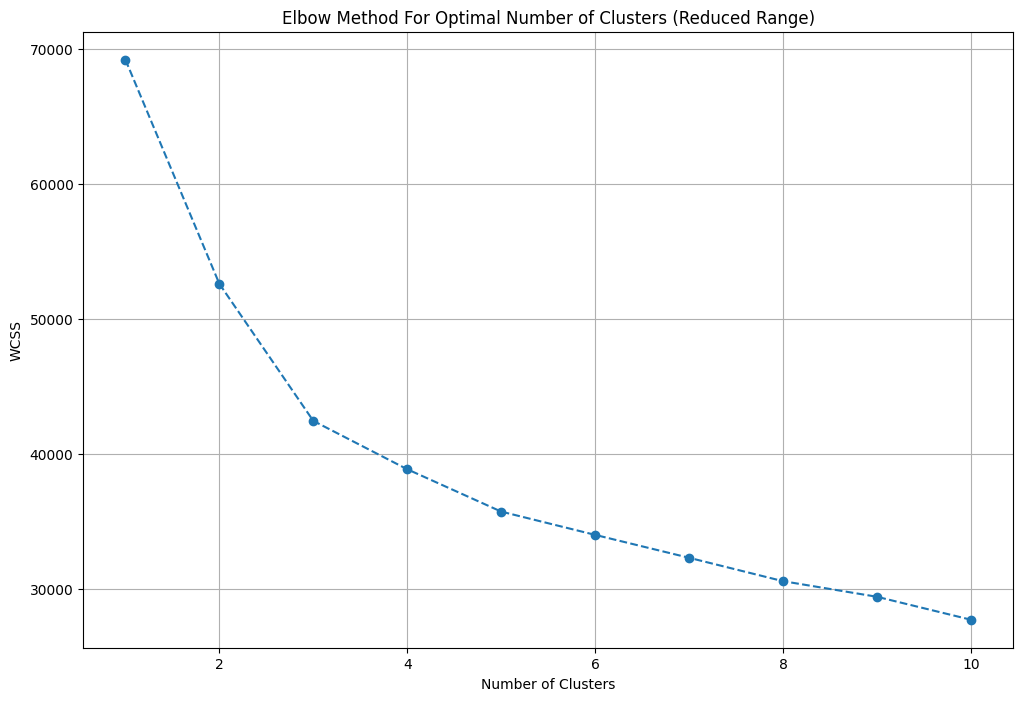

In [44]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [45]:
n_clusters = 6

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [46]:
cluster_assignments.shape

(3844,)

In [47]:
df = df.iloc[:,:-18]

In [48]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'pricePerSqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'additionalRoom',
       'floorNum', 'facing', 'agePossession', 'nearbyLocations',
       'furnishDetails', 'features', 'super_built_up_area', 'built_up_area',
       'carpet_area', 'study room', 'others', 'store room', 'pooja room',
       'servant room'],
      dtype='object')

In [49]:
df['furnishing_type'] = cluster_assignments

In [50]:
df.sample(2)

,property_type,society,sector,price,pricePerSqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,others,store room,pooja room,servant room,furnishing_type
3285,house,independent,sector 103,2.25,6367.0,3534.0,Built Up area: 3534 (328.32 sq.m.)Carpet area: 2000 sq.ft. (185.81 sq.m.),3,5,3+,not available,10.0,south,Undefined,NaN,NaN,NaN,NaN,3534.0,2000.0,0,0,0,0,0,0
1226,flat,corona optus,sector 37c,1.43,7185.0,1990.0,Super Built up area 1990(184.88 sq.m.)Carpet area: 1680 sq.ft. (156.08 sq.m.),3,3,3+,"servant room,others",2.0,north,Relatively New,"['The Esplanade Mall', 'Gurugram Road', 'Delhi Jaipur Expressway', 'Green Field Public School', 'Gurugram University', 'Medanta The Medicity', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'Kadipur Industrial Area', 'Holiday Inn Gurugram Sector 90', 'Tau DeviLal Sports Complex', 'Heritage badminton academy', 'SkyJumper Trampoline Park']",NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",1990.0,NaN,1680.0,0,1,0,0,1,0


In [51]:
df.sample(5)[['furnishDetails','furnishing_type']]

,furnishDetails,furnishing_type
2160,"['3 Fan', '1 Exhaust Fan', '2 Geyser', '4 AC', '1 Curtains', 'No Bed', 'No Chimney', 'No Dining Table', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",1
2733,"['6 Fan', '1 Exhaust Fan', '2 Geyser', '2 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",1
1064,NaN,0
1315,NaN,0
2725,NaN,0


#### 5.features

In [52]:
df[['society','features']].sample(5)

,society,features
3405,independent,['Water Storage']
50,dlf regency park,"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Swimming Pool', 'Maintenance Staff', 'No open drainage around', 'Park', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']"
3397,independent,['Water Storage']
3029,independent,"['Feng Shui / Vaastu Compliant', 'Park', 'Recently Renovated', 'Visitor Parking', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society']"
1073,tulip violet,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"


In [53]:
df['features'].isnull().sum()

np.int64(656)

#### To fill the missing values of *features* column, we will merge with apartment.csv

In [55]:
base_url = "https://raw.githubusercontent.com/pranta-iitp/Real-Estate-Property-Price-Prediction-Project/main/appartments.csv"
app_df  = pd.read_csv(base_url)

In [56]:
app_df.sample(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
209,Lion Infra Green Valley,"Land in Sector-35 Sohna, Gurgaon","['GD Goenka World School', 'GD Goenka University, Gurugram', 'Badshahpur Sohna Rd Hwy, Raghav Vatika', 'Vardaan Hospital & Trauma Centre', 'Discount Department Store']","{'GD Goenka World School': '1.4 KM', 'GD Goenka University, Gurugram': '1.6 KM', 'Badshahpur Sohna Rd Hwy, Raghav Vatika': '3 KM', 'Vardaan Hospital & Trauma Centre': '3.6 KM', 'Discount Department Store': '4.7 KM', 'Indira Gandhi Intl Airport': '35.8 KM'}",https://www.99acres.com/lion-infra-green-valley-sector-35-sohna-gurgaon-npxid-r373089,"{'Land': {'building_type': '', 'area_type': 'Plot Area', 'area': '1,341 - 1,521 sq.ft.', 'price-range': '₹ 1.14 - 1.29 Cr'}}","['Terrace Garden', 'Cricket Pitch', 'Amphitheatre', 'Badminton Court', 'Yoga/Meditation Area', 'Sewage Treatment Plant', 'Jogging Track', 'Rain Water Harvesting', '24x7 Security']"
141,DLF Regal Gardens,"2, 3, 4 BHK Apartment in Sector 90, Gurgaon","['HDFC Bank, Pataudi Rd', 'Holiday Inn Gurugram Sector 90', 'SS Omnia, Sector 86', 'Canara Bank - Nawada Fatehpur', 'ICICI Bank ATM, Sector 86']","{'HDFC Bank, Pataudi Rd': '1.6 KM', 'Holiday Inn Gurugram Sector 90': '1.6 KM', 'SS Omnia, Sector 86': '1.9 KM', 'Canara Bank - Nawada Fatehpur': '2.2 KM', 'ICICI Bank ATM, Sector 86': '2.3 KM', 'RPS International School': '2.3 KM', 'Silver Streak Multi Speciality': '2.3 KM', 'Aarvy Healthcare Super Speciality': '2.9 KM', 'RHM Public School': '3 KM', 'Miracles Apollo Cradle Hospital': '3.2 KM', 'Minda Industries Nawada Fatehpur': '4.2 KM', 'Numberdar market, IMT Manesar': '4.2 KM', ""Sodhi's Supermarket, Sector 82"": '4.6 KM', 'M3M SCO Shop cum Office': '4.8 KM', 'State Bank of India': '5.7 KM'}",https://www.99acres.com/dlf-regal-gardens-sector-90-gurgaon-npxid-r2718,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,438 - 1,527 sq.ft.', 'price-range': '₹ 91.61 - 97.29 L'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,693 - 1,967 sq.ft.', 'price-range': '₹ 1.24 - 1.71 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,215 sq.ft.', 'price-range': '₹ 1.59 - 1.93 Cr'}}","['Swimming Pool', 'School', 'Card Room', 'Solar Water Heating', 'Waiting Lounge', 'Theatre', 'Gazebo', 'Pool Table', 'Billiards']"


In [57]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [58]:
temp_df = df[df['features'].isnull()]

In [59]:
temp_df.shape

(656, 26)

In [60]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [61]:
# replace values from apartment.csv
df.loc[temp_df.index,'features'] = x.values

In [62]:
df['features'].isnull().sum()

np.int64(502)

In [63]:
df.loc[328]['features']

"['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']"

In [64]:
# Extract all unique furnishings from the furnishDetails column
all_features = []
for detail in df['features'].dropna():
    features = detail.replace('[', '').replace(']', '').replace("'", "").split(',')
    all_features.extend(features)
unique_features = list(set(all_features))

In [65]:
unique_features = [feature.strip() for feature in unique_features]

In [66]:
unique_features,len(unique_features)

(['Yoga/Meditation Area',
  'Infinity Pool',
  'Food Court',
  'Flower Garden',
  'Skating Rink',
  'Jogging Track',
  'Landscape Garden',
  'False Ceiling Lighting',
  'Reflexology Park',
  'Library',
  'Automated Car Wash',
  'School',
  'Maintenance Staff',
  'Clinic',
  'Swimming Pool',
  'Internet/wi-fi connectivity',
  'Valet Parking',
  'Water Storage',
  'Wi-Fi Connectivity',
  'Power Back-up',
  'Mini Theatre',
  'Solar Water Heating',
  'Waste Disposal',
  'Feng Shui / Vaastu Compliant',
  'Medical Centre',
  'Centrally Air Conditioned',
  'Piped-gas',
  'Concierge Service',
  'Natural Pond',
  'Video Door Security',
  'High Speed Elevators',
  'Cigar Lounge',
  'Bus Shelter',
  'Club House',
  'Squash Court',
  'Card Room',
  'Security / Fire Alarm',
  'Bar/Chill-Out Lounge',
  'Gymnasium',
  'Toddler Pool',
  'Shopping Centre',
  'High Ceiling Height',
  'Natural Light',
  'Water purifier',
  'Water Softener Plant',
  'Property Staff',
  'Laundry',
  'Airy Rooms',
  'Steam 

In [67]:
# Using a list of tuples to preserve all 168 features including duplicates
weights_list = [
    ('Lounge', 7),
    ('False Ceiling Lighting', 6),
    ('Library', 8),
    ('Barbecue', 6),
    ('Spa', 10),
    ('Car Parking', 6),
    ('Vastu Compliant', 4),
    ('Lounge', 7),  # Duplicate preserved
    ('Volley Ball Court', 7),
    ('Conference room', 7),
    ('Flower Garden', 6),
    ('Mini Theatre', 9),
    ('Gymnasium', 9),
    ('Centrally Air Conditioned', 8),
    ('Airy Rooms', 6),
    ('Multipurpose Court', 6),
    ('Visitors Parking', 6),
    ('Multipurpose Hall', 7),
    ('Internal Street Lights', 5),
    ('Food Court', 7),
    ('Natural Light', 6),
    ('Water purifier', 5),
    ('Shopping Centre', 7),
    ('High Ceiling Height', 7),
    ('Water Softener Plant', 5),
    ('Party Lawn', 7),
    ('24/7 Power Backup', 8),
    ('Infinity Pool', 10),
    ('Sewage Treatment Plant', 5),
    ('No open drainage around', 5),
    ('Water Storage', 4),
    ('Security Personnel', 8),
    ('CCTV Camera Security', 8),
    ('Reflexology Park', 8),
    ('"Childrens Play Area"', 6),
    ('Piped Gas', 4),
    ('Separate entry for servant room', 7),
    ('Low Density Society', 8),
    ('Mini Theatre', 9),  # Duplicate preserved
    ('Manicured Garden', 7),
    ('Swimming Pool', 10),
    ('Billiards', 8),
    ('Solar Water Heating', 6),
    ('Gazebo', 6),
    ('Salon', 6),
    ('Grocery Shop', 5),
    ('Manicured Garden', 7),  # Duplicate preserved
    ('Waste Disposal', 4),
    ('Landscape Garden', 7),
    ('Bar/Chill-Out Lounge', 8),
    ('Maintenance Staff', 6),
    ('Bank Attached Property', 5),
    ('Fitness Centre / GYM', 9),
    ('Piped-gas', 4),
    ('Maintenance Staff', 6),  # Duplicate preserved
    ('Internet/wi-fi connectivity', 6),
    ('Security Personnel', 8),  # Duplicate preserved
    ('Theatre', 9),
    ('Security / Fire Alarm', 8),
    ('Lift(s)', 6),
    ('Video Door Security', 8),
    ('Natural Pond', 7),
    ('24x7 Security', 8),
    ('Doctor on Call', 7),
    ('Bus Shelter', 4),
    ('Air Hockey', 6),
    ('Steam Room', 10),
    ('Food Court', 7),  # Duplicate preserved
    ('Sauna', 10),
    ('Foosball', 6),
    ('Concierge Service', 8),
    ('Visitor Parking', 6),
    ('Feng Shui / Vaastu Compliant', 4),
    ('Football', 7),
    ('Card Room', 7),
    ('False Ceiling Lighting', 6),  # Duplicate preserved
    ('Feng Shui / Vaastu Compliant', 4),  # Duplicate preserved
    ('Gated Community', 8),
    ('Skating Rink', 7),
    ('Clinic', 6),
    ('High Speed Elevators', 8),
    ('Bus Shelter', 4),  # Duplicate preserved
    ('Waste Disposal', 4),  # Duplicate preserved
    ('Water softening plant', 5),
    ('School', 6),
    ('Waiting Lounge', 6),
    ('Squash Court', 8),
    ('No open drainage around', 5),  # Duplicate preserved
    ('Badminton Court', 7),
    ('Doctor on Call', 7),  # Duplicate preserved
    ('Sun Deck', 7),
    ('Bowling Alley', 9),
    ('Cigar Lounge', 8),
    ('Restaurant', 7),
    ('Cricket Pitch', 7),
    ('Natural Pond', 7),  # Duplicate preserved
    ('Club house / Community Center', 8),
    ('24/7 Water Supply', 5),
    ('Skating Rink', 7),  # Duplicate preserved
    ('Entrance Lobby', 6),
    ('Solar Lighting', 6),
    ('Intercom Facility', 6),
    ('Automated Car Wash', 7),
    ('Earthquake Resistant', 7),
    ('Creche/Day care', 6),
    ('Intercom Facility', 6),  # Duplicate preserved
    ('Power Back-up', 8),
    ('Banquet Hall', 8),
    ('Visitor Parking', 6),  # Duplicate preserved
    ('Community Hall', 7),
    ('Internet/wi-fi connectivity', 6),  # Duplicate preserved
    ('Changing Area', 5),
    ('High Ceiling Height', 7),  # Duplicate preserved
    ('Swimming Pool', 10),  # Duplicate preserved
    ('RO System', 5),
    ('Pool Table', 7),
    ('Water Storage', 4),  # Duplicate preserved
    ('Recently Renovated', 6),
    ('Concierge Service', 8),  # Duplicate preserved
    ('Fountain', 7),
    ('Toddler Pool', 9),
    ('School', 6),  # Duplicate preserved
    ('Rain Water Harvesting', 6),
    ('Private Garden / Terrace', 8),
    ('Salon', 6),  # Duplicate preserved
    ('Laundry', 5),
    ('Infinity Pool', 10),  # Duplicate preserved
    ('Private Garden / Terrace', 8),  # Duplicate preserved
    ('Natural Light', 6),  # Duplicate preserved
    ('Basketball Court', 7),
    ('Water purifier', 5),  # Duplicate preserved
    ('Shopping Centre', 7),  # Duplicate preserved
    ('Lawn Tennis Court', 8),
    ('Aerobics Centre', 8),
    ('Jacuzzi', 10),
    ('Property Staff', 6),
    ('Club house / Community Center', 8),  # Duplicate preserved
    ('Pergola', 6),
    ('Security / Fire Alarm', 8),  # Duplicate preserved
    ('Golf Course', 10),
    ('Valet Parking', 8),
    ('Medical Centre', 6),
    ('Beach Volley Ball Court', 8),
    ('Yoga/Meditation Area', 8),
    ('Jogging Track', 7),
    ('Temple', 5),
    ('Bank Attached Property', 5),  # Duplicate preserved
    ('Amphitheatre', 8),
    ('Park', 6),
    ('Fitness Centre / GYM', 9),  # Duplicate preserved
    ('Milk Booth', 4),
    ('Wi-Fi Connectivity', 6),
    ('Club House', 8),
    ('Cafeteria', 6),
    ('Fire Fighting Systems', 7),
    ('Reading Lounge', 7),
    ('ATM', 5),
    ('Power Back-up', 8),  # Duplicate preserved
    ('Piped-gas', 4),  # Duplicate preserved
    ('Terrace Garden', 7),
    ('Power Back up Lift', 8),
    ('Lift(s)', 6),  # Duplicate preserved
    ('Car wash area', 6),
    ('Park', 6),  # Duplicate preserved
    ('Jogging Track', 7),  # Duplicate preserved
    ('Centrally Air Conditioned', 8),  # Duplicate preserved
    ('Spacious Interiors', 7),
    ('Business Lounge', 8)
]

# To access as a dictionary-like structure while preserving duplicates:
# You can convert to dict when needed: dict(weights_list)
# Or access by index: weights_list[0] gives ('Lounge', 7)


In [68]:
len(weights_list)

168

In [69]:
weights = dict(weights_list)

In [70]:
len(weights)

130

In [71]:
# Initialize luxury_scores with zeros for all rows
luxury_scores = [0] * len(df)

i = 1
for index, row in enumerate(df['features']):
    # if i == 4:  # Changed to 4 to process exactly 3 rows (i starts at 1)
    #     break
    # i+=1
    # print(f"\n=== Row {index} ===")
    # print(f"Features: {row}")
    if isinstance(row, str) == False:
      continue
    # Check if row is a list (your data structure)
    if isinstance(row, list):
        feature_list = row
    else:
        # Handle string representation of list
        feature_list = row.replace('[', '').replace(']', '').replace("'", "").split(',')

    total_score = 0
    #print("Feature breakdown:")

    for feature in feature_list:
        feature = feature.strip()
        feature_weight = weights.get(feature, 0)
        total_score += feature_weight
        #print(f"  {feature}: {feature_weight} points")
        luxury_scores[index] = total_score
        # Update the specific index instead of appending
        #luxury_scores[index] = total_score
    # print(f"Total Luxury Score: {total_score}")
    # print("-" * 50)


# Now assign the full-length list to DataFrame
df['luxury_score'] = luxury_scores



In [72]:
df.sample(3)

,property_type,society,sector,price,pricePerSqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,others,store room,pooja room,servant room,furnishing_type,luxury_score
3236,house,independent,sector 12,6.00,315789.0,190.0,Plot area 190(17.65 sq.m.)Carpet area: 1600 sq.ft. (148.64 sq.m.),9,6,2,not available,2.0,north-east,Old Property,"['Hanuman Mandir', 'Rajiv Memorial Eye Infirmary Jacobpura', 'Sharma Hospital Gurgaon', 'Gupta Hospital Gurgaon', 'Dr. Ajay S. Gupta Clinic', 'Verma E.N.T. Hospital', 'Nova Care Clinic', 'Ahooja Eye and Dental Institute Hospital', 'Dr. Sandeep Chauhan', 'Dental Health Centre', 'Lall Eye Care Centre', 'Om Charitable Dental & Implant Centre', 'Lall Nursing and Maternity Home', 'Dentecare - Multispeciality Dental Clinic', 'Kharbanda Maternity and Nursing Home', 'Lalit Dental Care', 'Triveni Hospital Gurgaon', 'M Goel Hospital', 'My Care Clinic', 'Aarvy Hospital', 'M.S Hospital', 'Kidney Clinic', 'Bindal Clinic', 'Centre For Sight Gurgaon New Railway Road', 'Dr. Sarvejeet Singh', 'Jackson Hospital', 'Rama Hospital & Nursing Home', 'Pasricha Hospital and Maternity Home', 'Swastik Maternity and Medical Centre', 'Ravi Clinic and Health Care Centre', 'Bhatnagar Maternity and Nursing Home', 'Thakral Nursing and Maternity Home', 'Shubham Hospital Gurgaon', 'Chiranjiv Hospital', 'Nangia Hospital Ent and Maternity', 'Sethi Hospital Gurgaon', 'Tirath Ram Hospitals Pvt Ltd', 'Satyam Hospital Gurgaon', 'Sparsh Hospital Gurgaon', 'Mamta Hospital Gurgaon', 'Lotus Hospital Gurgaon', 'IBP Petrol Station', 'Indian Oil', 'Punjab national bank', 'State bank of india sbi', 'State bank of india', 'Rang Parivartan', 'govt sec school', 'Dronacharya Government College', 'District library gurgaon']","['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,NaN,1600.0,0,0,0,0,0,0,0
1672,flat,chd avenue,sector 71,1.25,7171.0,1743.0,Super Built up area 1743(161.93 sq.m.),3,4,2,servant room,7.0,east,Relatively New,"['Huda City Centre', 'Apna Mart', 'Rajiv Chowk', 'Sohna Road', 'IFFCO Chowk', 'Medanta Hospital', 'Max Hospital, Gurugram', 'IGI Airport', 'HDFC Bank', 'Candor Park', 'Marriott Courtyard', 'Radisson Suites', 'Park Plaza', 'Flipkart Warehouse', 'Sadar Police Station']","['4 Fan', '1 Exhaust Fan', '3 Geyser', '10 Light', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1743.0,NaN,NaN,0,0,0,0,1,1,178
3250,house,independent,sector 6,0.50,13889.0,360.0,Plot area 40(33.45 sq.m.),5,3,3,not available,3.0,not available,Old Property,"['Chintapurni Mandir', 'Sheetla Mata Mandir', 'D.R. Rajnis Gupta Clinic', 'Aryan Hospital', 'Sparsh Hospital Gurgaon', 'Bhatnagar Maternity and Nursing Home', 'Ravi Clinic and Health Care Centre', 'Gurgaon Eye Centre', 'Geeta Nursing Home Gurgaon', 'Dr. Sarvejeet Singh', 'Dr. Agya Ram Sharma Clinic', 'Centre For Sight Gurgaon New Railway Road', 'Kidney Clinic', 'Bindal Clinic', 'Lalit Dental 

In [73]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'pricePerSqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'additionalRoom',
       'floorNum', 'facing', 'agePossession', 'nearbyLocations',
       'furnishDetails', 'features', 'super_built_up_area', 'built_up_area',
       'carpet_area', 'study room', 'others', 'store room', 'pooja room',
       'servant room', 'furnishing_type', 'luxury_score'],
      dtype='object')

In [74]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','additionalRoom'],inplace=True)

In [75]:
df.shape

(3844, 23)

In [78]:
df['society'].value_counts().head(3)

,count
society,
independent,514
tulip violet,75
ss the leaf,74


In [76]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)